In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('datasets/Crime_R.csv')
df.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [3]:
df.shape

(47, 27)

In [4]:
df = df[['ExpenditureYear0', 'ExpenditureYear10']]
df.head()

,ExpenditureYear0,ExpenditureYear10
0,69,71
1,55,54
2,47,44
3,46,41
4,106,97


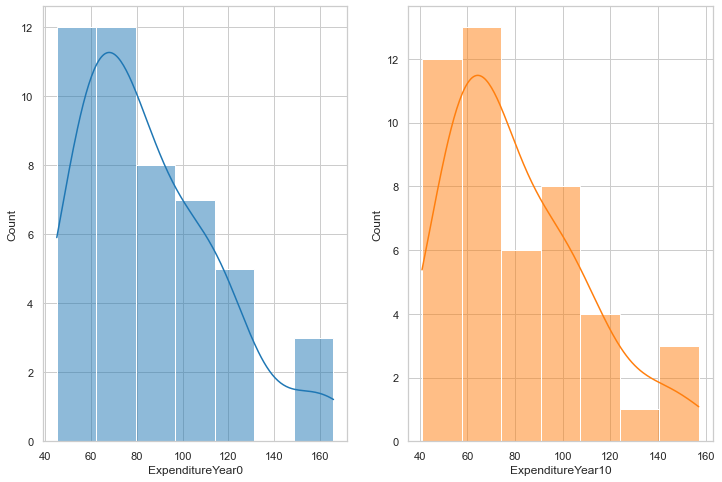

In [5]:
fig, ax = plt.subplots(figsize=(12, 8), ncols=2)
sns.histplot(df['ExpenditureYear0'], ax=ax[0], color='#1f77b4', label='ExpenditureYear0', kde=True)
sns.histplot(df['ExpenditureYear10'], ax=ax[1], color='#ff7f0e', label='ExpenditureYear10', kde=True)
plt.show()

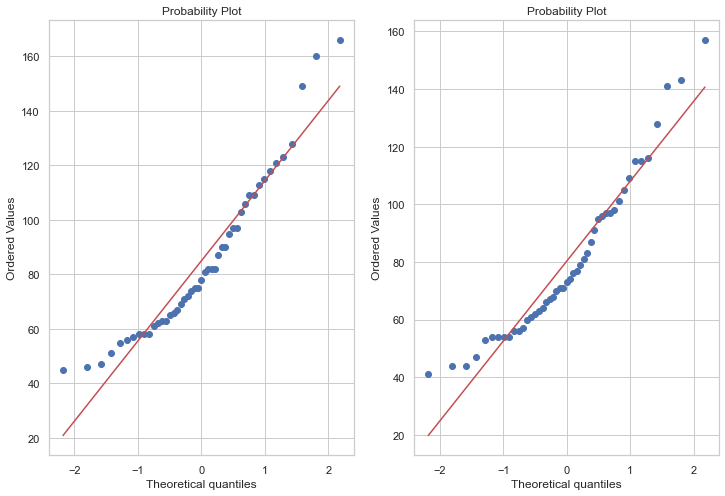

In [9]:
fig, ax = plt.subplots(figsize=(12, 8), ncols=2)
stats.probplot(df['ExpenditureYear0'], plot=ax[0])
stats.probplot(df['ExpenditureYear10'], plot=ax[1])
plt.show()

In [10]:
print("Null Hypothesis: ExpenditureYear0 and ExpenditureYear10 are normally distributed.")
p1 = stats.shapiro(df['ExpenditureYear0']).pvalue
p2 = stats.shapiro(df['ExpenditureYear10']).pvalue
if p1 > 0.05:
    print(f'ExpenditureYear0 is normally distributed. p-value: {round(p1, 3)}')
else:
    print(f'ExpenditureYear0 is not normally distributed. p-value: {round(p1, 3)}')
if p2 > 0.05:
    print(f'ExpenditureYear10 is normally distributed. p-value: {round(p2, 3)}')
else:
    print(f'ExpenditureYear10 is not normally distributed. p-value: {round(p2, 3)}')

Null Hypothesis: ExpenditureYear0 and ExpenditureYear10 are normally distributed.
ExpenditureYear0 is not normally distributed. p-value: 0.004
ExpenditureYear10 is not normally distributed. p-value: 0.007


In [11]:
# Paired T-test
print('Assumption of Paired T-test: Difference between paired observations is normally distributed.')
df['Difference'] = df['ExpenditureYear0'] - df['ExpenditureYear10']
print(f'Null Hypothesis: Difference between ExpenditureYear0 and ExpenditureYear10 is normally distributed.')
p = stats.shapiro(df['Difference']).pvalue
if p > 0.05:
    print(f'Difference between ExpenditureYear0 and ExpenditureYear10 is normally distributed. p-value: {round(p, 3)}')
else:
    print(f'Difference between ExpenditureYear0 and ExpenditureYear10 is not normally distributed. p-value: {round(p, 3)}')

Assumption of Paired T-test: Difference between paired observations is normally distributed.
Null Hypothesis: Difference between ExpenditureYear0 and ExpenditureYear10 is normally distributed.
Difference between ExpenditureYear0 and ExpenditureYear10 is normally distributed. p-value: 0.139


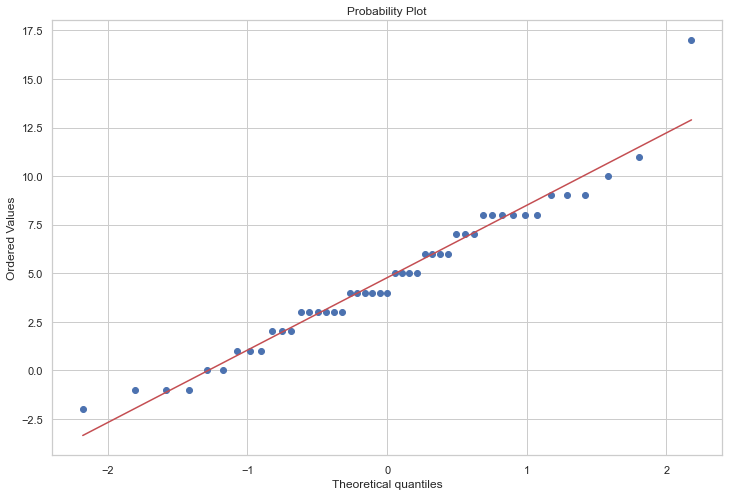

In [12]:
plt.figure(figsize=(12, 8))
stats.probplot(df['Difference'], plot=plt, dist='norm');

In [13]:
df_long_form = pd.melt(df,
                        value_vars=['ExpenditureYear0', 'ExpenditureYear10'],
                        var_name='Year',
                        value_name='Expenditure')
df_long_form.head()

,Year,Expenditure
0,ExpenditureYear0,69
1,ExpenditureYear0,55
2,ExpenditureYear0,47
3,ExpenditureYear0,46
4,ExpenditureYear0,106


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ExpenditureYear0,47.0,85.000000,29.718974,45.0,62.5,78.0,104.5,166.0
ExpenditureYear10,47.0,80.234043,27.961319,41.0,58.5,73.0,97.0,157.0
Difference,47.0,4.765957,3.707881,-2.0,2.5,4.0,7.5,17.0


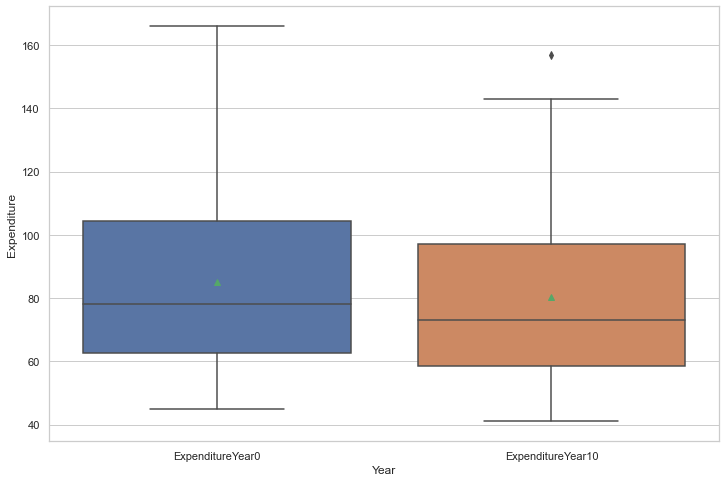

In [15]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='Year', y='Expenditure', data=df_long_form, showmeans=True)
plt.show();

In [16]:
print("Assumption of Paired T-test: Variances of paired observations are equal.")
print(f'Null Hypothesis: Variances of paired observations are equal.')
p = stats.levene(df['ExpenditureYear0'], df['ExpenditureYear10']).pvalue
if p > 0.05:
    print(f'Variances of paired observations are equal. p-value: {round(p, 3)}')
else:
    print(f'Variances of paired observations are not equal. p-value: {round(p, 3)}')

Assumption of Paired T-test: Variances of paired observations are equal.
Null Hypothesis: Variances of paired observations are equal.
Variances of paired observations are equal. p-value: 0.727


In [18]:
print("Paired T-Test:")
print("\tNull Hypothesis: ExpenditureYear0 and ExpenditureYear10 have same means.")
p = stats.ttest_rel(df['ExpenditureYear0'], df['ExpenditureYear10']).pvalue
if p > 0.05:
    print(f'\tExpenditureYear0 and ExpenditureYear10 have same means. p-value: {round(p, 3)}')
else:
    print(f'\tExpenditureYear0 and ExpenditureYear10 have different means. p-value: {round(p, 3)}')

Paired T-Test:
	Null Hypothesis: ExpenditureYear0 and ExpenditureYear10 have same means.
	ExpenditureYear0 and ExpenditureYear10 have different means. p-value: 0.0
